In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import warnings

warnings.filterwarnings("ignore")

dataset = pd.read_csv('C:/Users/dz234/OneDrive/Desktop/Learning Process/Applied Data Science/stretched blob clusters.csv')
X = dataset.iloc[:, [1, 2]].values
X

array([[ -2.54959127,   2.5643817 ],
       [  6.91967306,  -7.68498908],
       [  6.59579473, -11.0608146 ],
       ...,
       [ -3.4532048 ,   1.88423434],
       [  6.93461633, -11.69688187],
       [  5.33547104,  -6.01551775]])

In [12]:
# scalling the dataset 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
XX = ss.fit_transform(X)
XX

array([[-0.95308378,  1.01935241],
       [ 1.2580684 , -0.889631  ],
       [ 1.18244011, -1.51839105],
       ...,
       [-1.16408507,  0.89267244],
       [ 1.26155777, -1.63686095],
       [ 0.88814401, -0.57868576]])

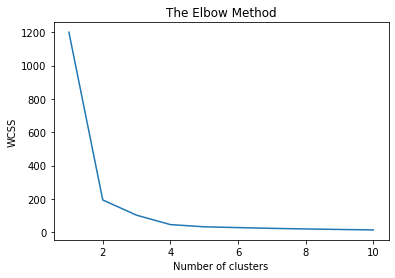

In [13]:
# find number of cluster, K 
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
    kmeans.fit(XX) # using dataset after scalled 
    wcss.append(kmeans.inertia_) #inertia is the wcss value 
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'Feature 1')

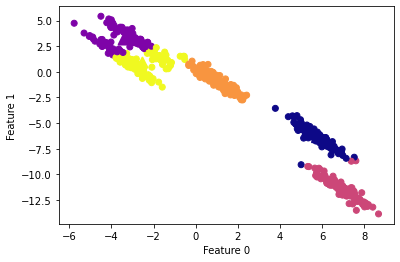

In [17]:
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0], 
kmeans.cluster_centers_[:, 1],
marker='^', 
c=[0, 1, 2, 3, 4], 
s=100, 
linewidth=2,
cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0, 0.5, 'Feature 1')

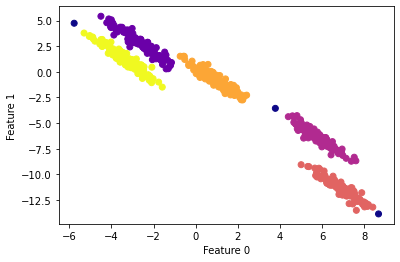

In [15]:
# clustering using DBSCAN 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# DBSCAN is better at this type of data 